
H value: 1.0

Runge Kutta: [0. 1. 2. 3. 4.] 
 [1.03162278 6.33882144 6.43166774 6.52295341 6.61275462] 

Adams-Bashforth-Moulton [0. 1. 2. 3. 4.] 
 [1.03162278 6.33882144 6.43277746 6.52568256 6.61752409] 



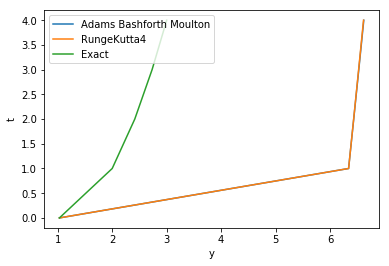

'\nThe predictor-corrector method uses Runge Kutta to estimate up to instance 3, and steps 4 and 5 are explicit and implicit.\n'

In [5]:
##Exercise of Numerical Differential Equations - Federal University of Minas Gerais
#Adams-Bashforth-Moulton Fourth-Order Predictor-Corrector method

import math, sys 
import numpy as np
import matplotlib.pyplot as plt

def f(y, t):
    return 1.0/(2*(y-1))

def exact_sol(t):
    return 1 + np.sqrt(t + 0.001)
    
y0 = 1.0 + np.sqrt(0.001)

def RungeKutta4(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    y[0] = y0
    t[0] = 0
    dt = T/float(n)

    for k in range(n):
        t[k+1] = t[k] + dt
        K1 = dt * f(y[k], t[k])
        K2 = dt * f(y[k] + 0.5*K1, t[k] + 0.5*dt)
        K3 = dt * f(y[k] + 0.5*K2, t[k] + 0.5*dt)
        K4 = dt * f(y[k] + K3, t[k] + dt)
        y[k+1] = y[k] + (1/6.0)*(K1 + 2*K2 + 2*K3 + K4)
    return y, t

def PredictorCorrector(f, y0, T, n):
    #RungeKutta4
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+2)
    y = np.zeros(n+2)
    y[0] = y0
    t[0] = 0
    dt = T/float(n)
    print("\nH value:",dt)
    y, t = RungeKutta4(f, y0, T, n)
    
    f0 = f(y[0],t[0])
    f1 = f(y[1],t[1])
    f2 = f(y[2],t[2])
    f3 = f(y[3],t[3])
    f4 = f(y[4],t[4])
    
    #print('Pre calculated - Runge kutta:')
    #print('f0:',round(f0,5),'\nf1:',round(f1,5),'\nf2:',round(f2,5),'\nf3:',round(f3,5))
    #print('f4 RK4:',round(f4,5))
    
    for k in range(n-1,0,-1):
        #Predictor: The fourth-order Adams-Bashforth technique, an explicit four-step method, is defined as:
        y[k+1] = y[k] + (dt/24) *(55*f3 - 59*f2 + 37*f1 - 9*f0)
        #print('\nPredictor y4:', round(y[k+1],5))
        f4_AB = f(y[k+1],t[k+1])
        #print('f4 AB4:',round(f4_AB,5))
        
        #Corrector: The fourth-order Adams-Moulton technique, an implicit three-step method, is defined as:              
        y[k+1] = y[k] + (dt/24) *(9*f(y[k+1],t[k+1]) + 19*f3 - 5*f2 + f1)
        # print('\nCorrector one y4:', round(y[k+1],6))
        
        y[k+1] = y[k] + (dt/24) *(9*f(y[k+1],t[k+1]) + 19*f3 - 5*f2 + f1)
        # print('Corrector two y4:', round(y[k+1],6))
    return y, t

Kutta4 = y1, t1 = RungeKutta4(f, y0, 4, 4)
BashMoulton = y2, t2 = PredictorCorrector(f, y0, 4, 4)
print("\nRunge Kutta:", t1,'\n', y1,'\n')    
print ('Adams-Bashforth-Moulton', t2,'\n',y2,'\n')

#For i = 4, 5, ... we use Adams Fourth-Order Predictor-Corrector method, which consists of 
# the predictor Adams-Bashforth, and corrector Adams-Moulton techniques.
plt.plot(BashMoulton[0], BashMoulton[1])
plt.plot(Kutta4[0], Kutta4[1])
plt.plot(exact_sol(Kutta4[1]), Kutta4[1])

plt.legend(['Adams Bashforth Moulton','RungeKutta4','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()

"""
The predictor-corrector method uses Runge Kutta to estimate up to instance 3, and steps 4 and 5 are explicit and implicit.
"""


In [6]:
# running with t = 4 and n = 64 first
Kutta4 = y, t = RungeKutta4(f, y0, 4, 64)
BashMoulton = y1, t1 = PredictorCorrector(f, y0, 4, 64)

print('Runge Kutta')
for i in range(64):
    print(round(y[i],3), end ='\t')
    
print('Adams Bashforth Moulton')
for i in range(64):
    print (round(y1[i],3),end = '\t')
    
"""
Values of the functions f0, f1, f2 and f3 obtained by Runge kutta 4,
and f4 obtained from predictors and correctors with two corrections.
Running method with n = 64, where approximation is obtained with h = 0.0625
and the approximate curve of the exact solution.
"""


H value: 0.0625
Runge Kutta
1.032	1.396	1.468	1.531	1.586	1.638	1.685	1.729	1.771	1.81	1.848	1.884	1.919	1.952	1.984	2.016	2.046	2.075	2.104	2.132	2.159	2.186	2.212	2.238	2.263	2.287	2.311	2.335	2.358	2.381	2.403	2.425	2.447	2.468	2.49	2.51	2.531	2.551	2.571	2.591	2.611	2.63	2.649	2.668	2.686	2.705	2.723	2.741	2.759	2.777	2.794	2.811	2.829	2.846	2.863	2.879	2.896	2.912	2.928	2.945	2.961	2.976	2.992	3.008	Adams Bashforth Moulton
1.032	1.396	1.454	1.525	1.586	1.64	1.69	1.736	1.78	1.821	1.86	1.897	1.932	1.967	2.0	2.032	2.063	2.093	2.122	2.15	2.178	2.205	2.231	2.257	2.283	2.307	2.332	2.356	2.379	2.402	2.425	2.447	2.469	2.491	2.512	2.533	2.554	2.574	2.595	2.615	2.634	2.654	2.673	2.692	2.711	2.729	2.748	2.766	2.784	2.801	2.819	2.837	2.854	2.871	2.888	2.905	2.921	2.938	2.954	2.97	2.987	3.002	3.018	3.034	

'\nValues of the functions f0, f1, f2 and f3 obtained by Runge kutta 4,\nand f4 obtained from predictors and correctors with two corrections.\nRunning method with n = 64, where approximation is obtained with h = 0.0625\nand the approximate curve of the exact solution.\n'

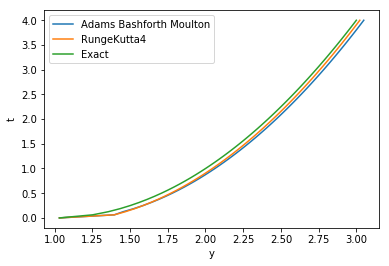

In [7]:
plt.plot(BashMoulton[0], BashMoulton[1])
plt.plot(Kutta4[0], Kutta4[1])
plt.plot(exact_sol(Kutta4[1]), Kutta4[1])

plt.legend(['Adams Bashforth Moulton','RungeKutta4','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()

In [8]:
# running with t = 4 and n = 64 first
Kutta4 = y, t = RungeKutta4(f, y0, 4, 128)
BashMoulton = y1, t1 = PredictorCorrector(f, y0, 4, 128)

print('Runge Kutta')
for i in range(64):
    print(round(y[i],3), end ='\t')
    
print('Adams Bashforth Moulton')
for i in range(64):
    print (round(y1[i],3),end = '\t')

"""
Values of the functions f0, f1, f2 and f3 obtained by Runge kutta 4,
and f4 obtained from predictors and correctors with two corrections.
Running method with n = 128, where approximation is obtained with h = 0.03125
and the approximate curve of the exact solution.
"""



H value: 0.03125
Runge Kutta
1.032	1.229	1.289	1.339	1.382	1.421	1.457	1.49	1.521	1.55	1.578	1.604	1.629	1.654	1.677	1.7	1.722	1.743	1.764	1.784	1.804	1.823	1.842	1.86	1.878	1.896	1.913	1.93	1.947	1.963	1.979	1.995	2.011	2.026	2.041	2.056	2.071	2.085	2.099	2.113	2.127	2.141	2.155	2.168	2.182	2.195	2.208	2.221	2.233	2.246	2.258	2.271	2.283	2.295	2.307	2.319	2.331	2.343	2.354	2.366	2.377	2.388	2.4	2.411	Adams Bashforth Moulton
1.032	1.229	1.276	1.334	1.382	1.424	1.462	1.497	1.529	1.559	1.588	1.615	1.641	1.666	1.69	1.713	1.736	1.758	1.779	1.799	1.819	1.839	1.858	1.877	1.895	1.913	1.93	1.947	1.964	1.981	1.997	2.013	2.029	2.044	2.059	2.075	2.089	2.104	2.118	2.133	2.147	2.161	2.174	2.188	2.201	2.214	2.228	2.241	2.253	2.266	2.279	2.291	2.303	2.316	2.328	2.34	2.351	2.363	2.375	2.386	2.398	2.409	2.421	2.432	

'\nValues of the functions f0, f1, f2 and f3 obtained by Runge kutta 4,\nand f4 obtained from predictors and correctors with two corrections.\nRunning method with n = 128, where approximation is obtained with h = 0.03125\nand the approximate curve of the exact solution.\n'

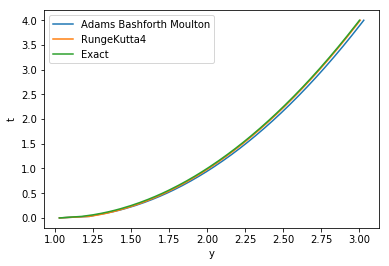

In [9]:
plt.plot(BashMoulton[0], BashMoulton[1])
plt.plot(Kutta4[0], Kutta4[1])
plt.plot(exact_sol(Kutta4[1]), Kutta4[1])

plt.legend(['Adams Bashforth Moulton','RungeKutta4','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()